# Домашнее задание 9

Это домашнее задание по материалам 12го семинара. Дедлайн по отправке - 23:55 5 мая. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_9

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим одномерную задачу минимизации:
\begin{equation}
\min_{x \in \mathbb{R}} f(x) = x \arctan x - \frac{1}{2} \log (1 + x^2).
\end{equation}

__(а)__ Реализуйте для этой задачи метод градиентного спуска и метод Ньютона. Нарисуйте графики сходимости данных методов для двух разных точек старта $x^0 = 1.3$ и $x^0 = 1.5$. Сделайте вывод. В общем случае для каких $x^0$ еще есть сходимость метода Ньютона, а для каких она пропадает? Почему?

$$
f'(x) = \arctan x + \dfrac{x}{1+x^2} - \dfrac{x}{1+x^2} = \arctan x = 0 \Leftrightarrow x = 0 \\
f''(x) = \dfrac{1}{1+x^2} \\
x_{k+1} = x_k - \dfrac{f'(x_k)}{f''(x_k)} = x_k - (1+x_k^2)\arctan x_k$$

Рассмотрим уравнение$|x-(1+x^2)\arctan{x}| = x$.

Оно имеет 2 решения: 0 и 1.39. Сходимость при $x^0 < 1.39$.

In [1]:
import numpy as np
import scipy.linalg as la
import math
import matplotlib.pyplot as plt
import time
import random

In [99]:
def f(x):
    return x * np.arctan(x) - 0.5 * np.log(1+x**2)

def grad(x):
    return np.arctan(x)

def hess(x):
    return 1/(1+x**2)

def error(x):
    #return grad(x)**2
    #return x**2
    return abs(x)

def NG(x0, gamma, iters=1000):
    
    x = x0
    errs = []
    acc = []

    for k in range(iters):
        x = x - gamma(x,k) * (hess(x))**(-1) * grad(x)
        errs.append(error(x))

    return errs

# L = pi
def GD(x0, gamma, iters=1000):
    
    x = x0
    errs = []
    acc = []

    for k in range(iters):
        x = x - gamma(x,k) * grad(x)
        errs.append(error(x))

    return errs

In [52]:
def risovach(errs, labels, title=''):

    plt.figure(figsize=(8, 5))

    for err, lab in zip(errs, labels):
        plt.plot(range(len(err)), np.log(err), label=lab)
    ylabel = 'Логарифм критерия'

    plt.xlabel("Номер итерации")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid()
    plt.legend(fontsize=12)
    plt.show()

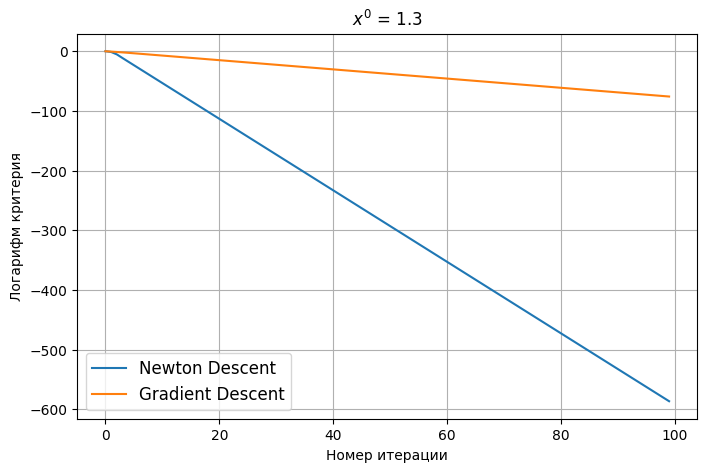

In [79]:
iters = 100
errs_ng = NG(1.3, gamma=lambda x, k: 0.95, iters=iters)
errs_gd = GD(1.3, gamma=lambda x, k: 0.32, iters=iters)
risovach(errs=[errs_ng, errs_gd], labels=['Newton Descent', 'Gradient Descent'], title=r'$x^0$ = 1.3')

Метод Ньютона значительно опережает градиентный спуск по итерациям. 

При $\gamma = 1$ и $x^0 = 1.5$ он, как и было предсказано, не сходится.

/tmp/ipykernel_5565/2060958522.py:9: RuntimeWarning: overflow encountered in double_scalars
  return x**2
/tmp/ipykernel_5565/2060958522.py:5: RuntimeWarning: overflow encountered in double_scalars
  return 1/(1+x**2)
/tmp/ipykernel_5565/2060958522.py:18: RuntimeWarning: divide by zero encountered in double_scalars
  x = x - gamma(x,k) * (hess(x))**(-1) * grad(x)
/tmp/ipykernel_5565/2060958522.py:18: RuntimeWarning: invalid value encountered in double_scalars
  x = x - gamma(x,k) * (hess(x))**(-1) * grad(x)


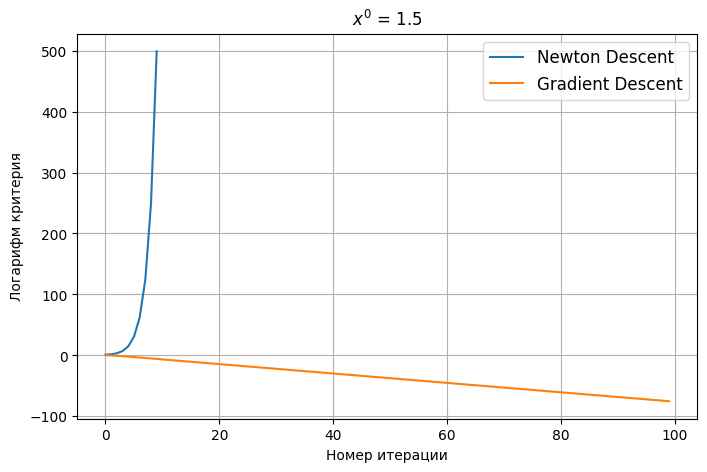

In [60]:
iters = 100
errs_ng = NG(1.5, gamma=lambda x, k: 1, iters=iters)
errs_gd = GD(1.5, gamma=lambda x, k: 0.32, iters=iters)
risovach(errs=[errs_ng, errs_gd], labels=['Newton Descent', 'Gradient Descent'], title=r'$x^0$ = 1.5')

__(б)__ Реализуйте две модификации метода Ньютона: демпфированный (добавление шага) и кубический метод Ньютона (смотри [статью](https://link.springer.com/article/10.1007/s10107-006-0706-8)). Решают ли эти методы проблему сходимости метода Ньютона для стартовой точки $x^0 = 1.5$? В демпфированном методе попробуйте разные стратегии подбора шага: увеличивающийся, Армихо и другие.

Если взять $\gamma = 0.8 < 1$, можно добиться сходимости метода Ньютона и из начальной $x^0 = 1.5$.

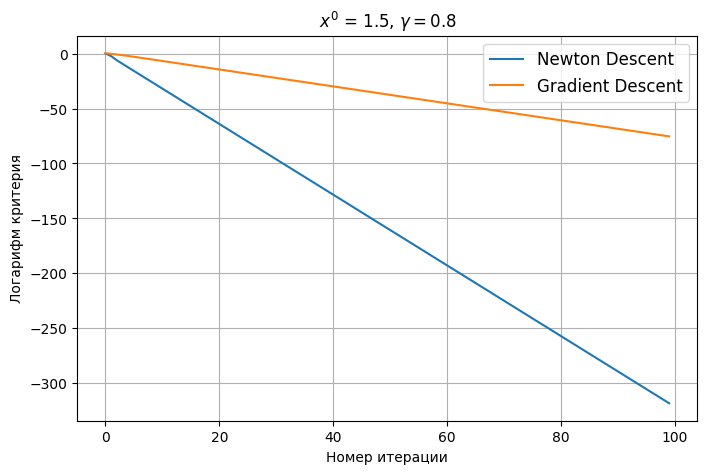

In [80]:
iters = 100
errs_ng = NG(1.5, gamma=lambda x, k: 0.8, iters=iters)
errs_gd = GD(1.5, gamma=lambda x, k: 0.32, iters=iters)
risovach(errs=[errs_ng, errs_gd], labels=['Newton Descent', 'Gradient Descent'], title=r'$x^0$ = 1.5, $\gamma = 0.8$')

Рассмотрим несколько стратегий: 
1. постоянный шаг;
2. уменьшающийся с 1 до 0;
3. увеличивающийся с 0 до 1;
4. правило Армихо.

In [111]:
def gamma_arm(x, k, eps=0.5, theta=0.99):
    gamma = 0.999
    while f(x) - f(x + gamma * grad(x)) > gamma * eps:
        gamma = gamma * theta
    return gamma

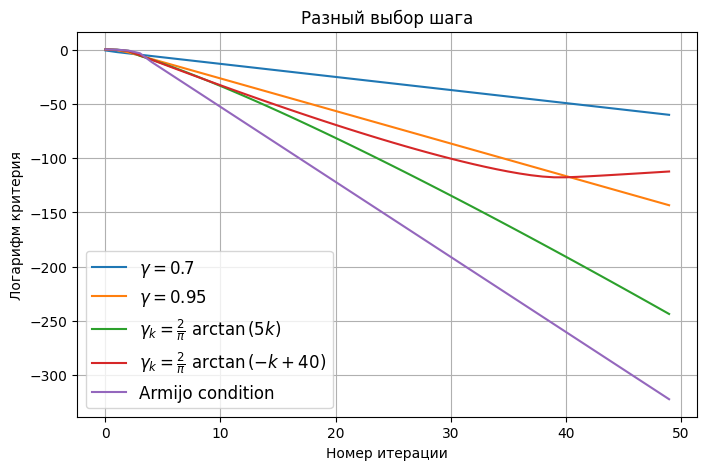

In [113]:
iters = 50
errs_const_1 = NG(1.3, gamma=lambda x, k: 0.7, iters=iters)
errs_const_2 = NG(1.3, gamma=lambda x, k: 0.95, iters=iters)
errs_incr = NG(1.3, gamma=lambda x, k: 2/3.1415 * np.arctan(5*k), iters=iters)
errs_decr = NG(1.3, gamma=lambda x, k: 2/3.1415 * np.arctan(-k + 40), iters=iters)
errs_arm = NG(1.3, gamma=gamma_arm, iters=iters)
risovach(errs=[errs_const_1, errs_const_2, errs_incr, errs_decr, errs_arm], 
         labels=[r'$\gamma = 0.7$', r'$\gamma = 0.95$', r'$\gamma_k = \frac{2}{\pi} \ \arctan{(5k)}$',
                 r'$\gamma_k = \frac{2}{\pi} \ \arctan{(-k + 40)} $', r'Armijo condition'], 
         title=r'Разный выбор шага')

Выводы:
1. постоянный шаг сходится лучше, если он близок к 1;
2. уменьшающийся шаг может расходиться;
3. увеличивающийся до 1 шаг показал себя очень неплохо;
4. в правиле Армихо следует брать начальный шаг $\gamma_0 \approx 1$, и большую $\theta \approx 0.9 - 0.99$.

## Задача 2

Вернемся к задаче логистической регресии на датасете _mushrooms_. Добавьте к этой задаче $\ell_2$-регуляризатор с $\lambda = L/100$. 

__(а)__ Для данной задачи реализуйте метод Ньютона и метод градиентного спуска. Попробуйте комбинировать эти два метода, чтобы добиться хорошего решения задачи регрессии, но избежать расходимости метода Ньютона. Как это будете делать? Постройте график сходимости.

In [1]:
#ответ

__(б)__ Для данной задачи реализуйте квазиньютоновские методы: Бройдена, DFP, BFGS (смотри Главу 6 из [книги](https://www.csie.ntu.edu.tw/~r97002/temp/num_optimization.pdf), а особенности реализации можно посмотреть [здесь](https://github.com/scipy/scipy/blob/v0.18.1/scipy/optimize/optimize.py#L874-L976)), L-BFGS (смотри [статью](http://users.iems.northwestern.edu/~nocedal/PDFfiles/limited-memory.pdf)). Решите с помощью них задачу регресии. Постйроте графики сходимости и изменения accuracy. Сделайте вывод.

In [2]:
#ответ

__Бонусные пункты__

__(в)__ Реализуйте подход из [работы](https://pages.cs.wisc.edu/~swright/726/handouts/barzilai-borwein.pdf). С помощью них решите задачу регресии. Сравните их работу с квазиньютоновскими методами. Сделайте вывод.

In [ ]:
#ответ

__(г)__ Реализуйте методы Newton-Learn и Cubic-Newton-Learn из [работы](https://proceedings.mlr.press/v139/islamov21a.html). С помощью них решите задачу регресии. Сравните их работу с квазиньютоновскими методами. Какой критерий сравнения будете использовать? 

In [ ]:
#ответ